<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, October 18, 2024 (Amsterdam time)</font> 
</center>
<center> 
    <font size="4"><b>TA's:  Yue, Konrad & Thies</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID: 13426192\
Student1 Name: Emma Kasteleyn

Student2 ID: 15552055\
Student2 Name: Platon Karageorgis

Student3 ID: 13854577\
Student3 Name: Jasper van der Valk

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

In [1]:
#!pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu118
import os
import pickle
import wandb
wandb.login()


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: karageorgisplatonas (nlp-squad). Use `wandb login --relogin` to force relogin


True

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR100
from torch.utils.data import random_split
from torchvision.datasets import STL10
from torch.utils.data import random_split
from sklearn.manifold import TSNE

from PIL import Image
from torch.utils.data import DataLoader, Dataset, random_split

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Files already downloaded and verified
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7411765..0.67058825].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9529412].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.92941177].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.75686276..1.0].
Clipping input data to the va

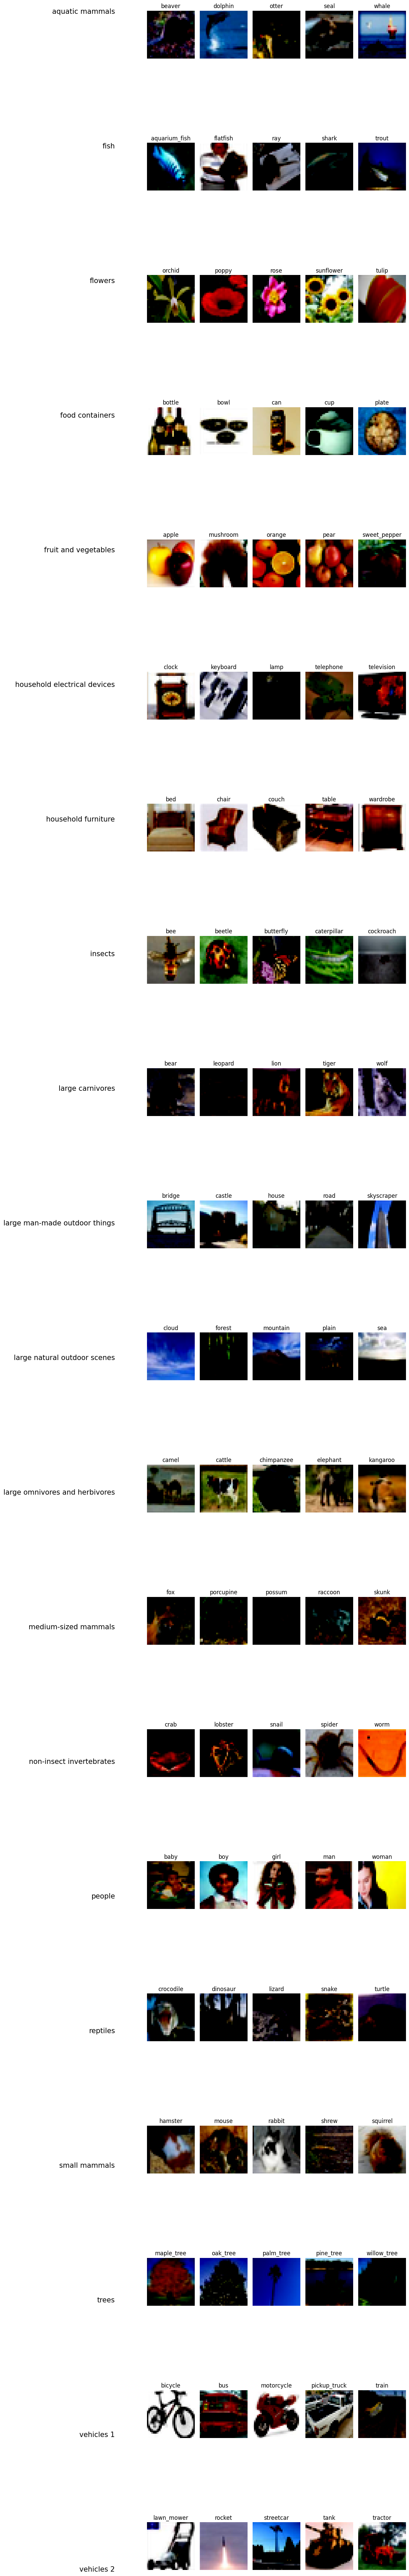

In [3]:
# YOUR CODE HERE
# First count the amount of superclasses. Each superclass has 5 subclasses
num_superclasses = len(superclasses)
# Each row is a superclass and the columns in that row are the subclasses
fig, axs = plt.subplots(num_superclasses, 5, figsize=(8, 4 * num_superclasses))

# Iterate through the superclasses
for i, (superclass, subclasses) in enumerate(superclass_to_indices.items()):
    # Iterate through the subclasses
    fig.text(-0.1, (num_superclasses - i - 0.5) / num_superclasses, superclass, ha='right', va='center', fontsize=15)

    for j, subclass_id in enumerate(subclasses):
        # Find an image that belongs to this subclass
        found_image = False
        for images, labels in train_data_loader:
            # Get the indices of images that belong to the subclass
            indices = (labels == subclass_id).nonzero(as_tuple=True)[0]

            if len(indices) > 0:
                # Select a random image from the subclass
                image_indice = np.random.choice(indices)
                image, label = images[image_indice], labels[image_indice]

                # Turn into numpy array for plotting
                image_np = image.numpy().transpose(1, 2, 0)

                # Plot the image
                axs[i,j].imshow(image_np)
                axs[i,j].axis('off')
                axs[i,j].set_title(classes[label.item()])

                found_image = True
                break

plt.tight_layout()
plt.show()


<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [4]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes, use_batch_norm=False):

        super(TwoLayerNet, self).__init__()

        self.batch = use_batch_norm  # batch normalization flag

        self.layer1 = nn.Linear(input_size, hidden_size)

        if self.batch:
            self.bn1 = nn.BatchNorm1d(hidden_size)

        # Output layer
        self.layer2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):

        x = torch.flatten(x, start_dim=1)

        if self.batch:
            x = F.relu(self.bn1(self.layer1(x)))
        else:
            x = F.relu(self.layer1(x))

        x = self.layer2(x)

        return x


<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [5]:
class ConvNet(nn.Module):

    def __init__(self, use_batch_norm=False):

        super(ConvNet, self).__init__()

        self.use_batch_norm = use_batch_norm  # Store batch normalization flag

        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        if self.use_batch_norm:
            self.bn1 = nn.BatchNorm2d(6)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        if self.use_batch_norm:
            self.bn2 = nn.BatchNorm2d(16)

        # Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1, padding=0)
        if self.use_batch_norm:
            self.bn3 = nn.BatchNorm2d(120)

        # First fully connected layer
        self.lin1 = nn.Linear(120, 120)
        if self.use_batch_norm:
            self.bn4 = nn.BatchNorm1d(120) 

        # Second fully connected layer
        self.lin2 = nn.Linear(120, 100)

    def forward(self, x):
        
        # First convolution + ReLU + Max pooling
        x = F.relu(self.bn1(self.conv1(x))) if self.use_batch_norm else F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        # Second convolution + ReLU + Max pooling
        x = F.relu(self.bn2(self.conv2(x))) if self.use_batch_norm else F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        # Third convolution + ReLU
        x = F.relu(self.bn3(self.conv3(x))) if self.use_batch_norm else F.relu(self.conv3(x))

        # Flatten the tensor
        x = torch.flatten(x, 1)

        # First fully connected layer + ReLU
        x = F.relu(self.bn4(self.lin1(x))) if self.use_batch_norm else F.relu(self.lin1(x))

        # Second fully connected layer
        x = self.lin2(x)

        return x


<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [6]:
class CIFAR100_loader(Dataset):
    
    def __init__(self, root, train=True, transform=None, download=False):

        self.train = train
        self.transform = transform
        self.download = download

        if download:

            torchvision.datasets.CIFAR100(root=root, train=train, download=True)

        if train:
            data_file = os.path.join(root, 'cifar-100-python', 'train')
        else:
            data_file = os.path.join(root, 'cifar-100-python', 'test')

        with open(data_file, 'rb') as f:
            data_dict = pickle.load(f, encoding='bytes')
            self.images = data_dict[b'data']
            self.labels = data_dict[b'fine_labels']

            self.images = self.images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
            self.images = self.images.astype(np.uint8)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, label


In [7]:
def create_transforms():

    transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
    ])
    return transform

In [8]:
def create_optimizer(model, learning_rate=0.001):

    # YOUR CODE HERE
    return torch.optim.Adam(model.parameters(), lr=learning_rate)

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [9]:
def validate(net, testloader):
    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [10]:
def validate_per_class(net, testloader, classes):

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [11]:
def train(net, train_loader, validation_loader, criterion, optimizer, epochs=50, scheduler=None, patience=3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)

    best_val_loss = float('inf')
    patience_counter = 0

    # Lists to store metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training phase
        net.train()
        training_loss = 0.0
        train_total = 0
        train_correct = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            training_loss += loss.item() * inputs.size(0)

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        if scheduler:
            scheduler.step()

        # Validation phase
        net.eval()
        validation_loss = 0.0
        val_total = 0
        val_correct = 0

        with torch.no_grad():
            for inputs, labels in validation_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)
                loss = criterion(outputs, labels)

                validation_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        # Compute average losses and accuracies
        avg_train_loss = training_loss / len(train_loader.dataset)
        avg_val_loss = validation_loss / len(validation_loader.dataset)
        train_accuracy = 100 * train_correct / train_total
        val_accuracy = 100 * val_correct / val_total

        # Append metrics to lists
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
              f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

        # Early stopping logic
        if avg_val_loss <= best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            # Optionally save the best model
            torch.save(net.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    print("Training Completed")
    return train_losses, val_losses, train_accuracies, val_accuracies


First, initialize the datasets and data loaders for both models.

Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [12]:
transform_custom = create_transforms()

train_set_custom = CIFAR100_loader(root='./data/', train=True, transform=transform_custom, download=True)
test_set_custom = CIFAR100_loader(root='./data/', train=False, transform=transform_custom, download=True)

val_size = int(0.2 * len(train_set_custom))  # 20% for validation
train_size = len(train_set_custom) - val_size

train_subset_custom, val_subset_custom = random_split(train_set_custom, [train_size, val_size])

train_loader_2 = DataLoader(dataset=train_subset_custom, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_subset_custom, batch_size=64, shuffle=False)
test_loader = DataLoader(dataset=test_set_custom, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
# Learning rate scheduler
def create_scheduler(optimizer, step_size=30, gamma=0.1):

    return optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)

In [14]:
model_TwoLayer = TwoLayerNet(3 * 32 * 32, 120, 100)

print(torch.cuda.is_available())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_TwoLayer.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_TwoLayer = create_optimizer(model_TwoLayer)

print('Training the Model: TwoLayerNet')
train_losses1, val_losses1, train_accuracies1, val_accuracies1 = train(
    net=model_TwoLayer,
    train_loader=train_loader_2,
    validation_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer_TwoLayer,
    epochs=50,
    scheduler=create_scheduler(optimizer_TwoLayer),
    patience=5
)


print('Validating the Model: TwoLayerNet')
validate(model_TwoLayer, test_loader)

True
Training the Model: TwoLayerNet
Epoch [1/50], Train Loss: 3.8270, Train Acc: 13.23%, Val Loss: 3.6334, Val Acc: 16.05%
Epoch [2/50], Train Loss: 3.4200, Train Acc: 19.72%, Val Loss: 3.4861, Val Acc: 18.47%
Epoch [3/50], Train Loss: 3.2387, Train Acc: 22.86%, Val Loss: 3.4314, Val Acc: 20.68%
Epoch [4/50], Train Loss: 3.1096, Train Acc: 25.37%, Val Loss: 3.4512, Val Acc: 20.74%
Epoch [5/50], Train Loss: 2.9974, Train Acc: 27.47%, Val Loss: 3.4575, Val Acc: 20.54%
Epoch [6/50], Train Loss: 2.9158, Train Acc: 28.76%, Val Loss: 3.4252, Val Acc: 20.94%
Epoch [7/50], Train Loss: 2.8353, Train Acc: 30.44%, Val Loss: 3.4812, Val Acc: 20.87%
Epoch [8/50], Train Loss: 2.7666, Train Acc: 31.77%, Val Loss: 3.4852, Val Acc: 21.13%
Epoch [9/50], Train Loss: 2.7069, Train Acc: 32.87%, Val Loss: 3.5098, Val Acc: 21.62%
Epoch [10/50], Train Loss: 2.6430, Train Acc: 34.24%, Val Loss: 3.5305, Val Acc: 22.47%
Epoch [11/50], Train Loss: 2.5930, Train Acc: 35.12%, Val Loss: 3.5760, Val Acc: 21.50%
Earl

21.02

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [15]:
model_ConvNet = ConvNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ConvNet.to(device)

print(torch.cuda.is_available())

criterion = nn.CrossEntropyLoss()

optimizer_ConvNet = create_optimizer(model_ConvNet)

print('Training the Model: ConvNet')
train_losses2, val_losses2, train_accuracies2, val_accuracies2 = train(
    net=model_ConvNet,
    train_loader=train_loader_2,
    validation_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer_ConvNet,
    epochs=50,
    scheduler=create_scheduler(optimizer_ConvNet),
    patience=5
)


print('Validating the Model: ConvNet')
validate(model_ConvNet, test_loader)

True
Training the Model: ConvNet
Epoch [1/50], Train Loss: 4.0387, Train Acc: 7.91%, Val Loss: 3.7655, Val Acc: 12.60%
Epoch [2/50], Train Loss: 3.5667, Train Acc: 15.49%, Val Loss: 3.5087, Val Acc: 16.63%
Epoch [3/50], Train Loss: 3.3318, Train Acc: 19.70%, Val Loss: 3.3015, Val Acc: 20.10%
Epoch [4/50], Train Loss: 3.1696, Train Acc: 22.72%, Val Loss: 3.1953, Val Acc: 22.06%
Epoch [5/50], Train Loss: 3.0542, Train Acc: 24.74%, Val Loss: 3.1204, Val Acc: 23.32%
Epoch [6/50], Train Loss: 2.9608, Train Acc: 26.65%, Val Loss: 3.0599, Val Acc: 24.24%
Epoch [7/50], Train Loss: 2.8789, Train Acc: 28.03%, Val Loss: 3.0268, Val Acc: 25.39%
Epoch [8/50], Train Loss: 2.8125, Train Acc: 29.22%, Val Loss: 2.9905, Val Acc: 26.45%
Epoch [9/50], Train Loss: 2.7479, Train Acc: 30.62%, Val Loss: 2.9652, Val Acc: 26.32%
Epoch [10/50], Train Loss: 2.6956, Train Acc: 31.59%, Val Loss: 2.9461, Val Acc: 26.86%
Epoch [11/50], Train Loss: 2.6499, Train Acc: 32.52%, Val Loss: 2.9240, Val Acc: 27.90%
Epoch [12

30.19

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

In [16]:
def create_optimizer_2(model, learning_rate, weight_decay, optimizer_type):
    if optimizer_type == 'SGD':
        return torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:  # Use Adam as the fallback
        return torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

In [17]:
def create_transforms_2(transform_type):
    '''
    Creates the data transformations for the dataset based on the specified transform type.

    Args:
        transform_type (str): The type of transform to apply ('random_flip' or 'random_rotation').

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''
    if transform_type == 'random_flip':
        transform = transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                                 std=[0.2675, 0.2565, 0.2761])
        ])
    elif transform_type == 'random_rotation':
        transform = transforms.Compose([
            transforms.RandomRotation(15),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                                 std=[0.2675, 0.2565, 0.2761])
        ])
    else:
        # Default transform if none specified
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5071, 0.4867, 0.4408],
                                 std=[0.2675, 0.2565, 0.2761])
        ])
    return transform


In [18]:
# Sweep configuration
sweep_config = {
    'method': 'random',  # Random search
    'metric': {
        'name': 'validation_accuracy',  # Metric to optimize
        'goal': 'maximize'  # Direction of optimization
    },
    'parameters': {
        'learning_rate': {
            'values': [0.00005, 0.0001, 0.001]  # Search space for learning rate
        },
        'batch_size': {
            'values': [32, 64, 128]  # Search space for batch size
        },
        'optimizer': {
            'values': ['Adam', 'SGD']  # Search space for optimizer
        },
        'weight_decay': {
            'values': [0.0001, 0.001]  # Search space for weight decay
        },
        'gamma': {
            'values': [0.1, 0.6]  # Search space for StepLR gamma factor
        },
        'transform': {
            'values': ['random_flip', 'random_rotation']
        }
    }
}

In [19]:
data_dir = './data/'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

In [20]:
class CIFAR100_loader(Dataset):
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
            download (bool): If True, downloads the dataset from the internet and puts it in root directory.
        '''
        self.cifar100_data = CIFAR100(root=root, train=train, download=download)
        self.transform = transform

    def __len__(self):
        '''Returns the number of samples in the dataset.'''
        return len(self.cifar100_data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''
        img, label = self.cifar100_data[idx]  # This should return a PIL Image and label

        # Ensure the image is a PIL Image
        if isinstance(img, np.ndarray):
            img = Image.fromarray(img)

        if self.transform:
            img = self.transform(img)

        return img, label


In [21]:
def train_sweep(config=None):
    with wandb.init(config=config, reinit=True):
        config = wandb.config  # Access all hyperparameters

        # Create transformations based on the hyperparameter
        transform_custom = create_transforms_2(config.transform)

        # Initialize the datasets with the given transform
        train_set_custom = CIFAR100_loader(root=data_dir, train=True, transform=transform_custom, download=not os.path.exists(os.path.join(data_dir, 'cifar-100-python')))
        test_set_custom = CIFAR100_loader(root=data_dir, train=False, transform=transform_custom, download=False)

        # Split the training set into training and validation subsets
        val_size = int(0.2 * len(train_set_custom))  # 20% for validation
        train_size = len(train_set_custom) - val_size
        train_subset_custom, val_subset_custom = random_split(train_set_custom, [train_size, val_size])

        # Create data loaders with batch size from config
        train_loader = DataLoader(dataset=train_subset_custom, batch_size=config.batch_size, shuffle=True)
        val_loader = DataLoader(dataset=val_subset_custom, batch_size=config.batch_size, shuffle=False)
        test_loader = DataLoader(dataset=test_set_custom, batch_size=config.batch_size, shuffle=False)


        # Initialize Model
        model_TwoLayer = TwoLayerNet(3 * 32 * 32, 120, 100, use_batch_norm=True)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model_TwoLayer.to(device)

        # Define Loss function
        criterion = nn.CrossEntropyLoss()

        # Create Optimizer and Scheduler with W&B-configured hyperparameters
        optimizer_TwoLayer = create_optimizer_2(
            model_TwoLayer, config.learning_rate, config.weight_decay, config.optimizer
        )
        scheduler_TwoLayer = create_scheduler(
            optimizer_TwoLayer, gamma=config.gamma
        )

        # Train the model
        _, _, _, _ = train(
            net=model_TwoLayer,
            train_loader=train_loader,
            validation_loader=val_loader,
            criterion=criterion,
            optimizer=optimizer_TwoLayer,
            epochs=50,
            scheduler=scheduler_TwoLayer,
            patience=5  # Early stopping patience
        )

        # Validate the model and log the results
        val_accuracy = validate(model_TwoLayer, test_loader)
        wandb.log({"validation_accuracy": val_accuracy})


In [22]:
#sweep_id = wandb.sweep(sweep_config, project="two_layer_net_sweep")
#wandb.agent(sweep_id, function=train_sweep, project="two_layer_net_sweep")



In [23]:
def train_sweep_2(config=None):
    with wandb.init(config=config, reinit=True):
        config = wandb.config  # Access all hyperparameters

        # Create transformations based on the hyperparameter
        transform_custom = create_transforms_2(config.transform)

        # Initialize the datasets with the given transform
        train_set_custom = CIFAR100_loader(root=data_dir, train=True, transform=transform_custom, download=not os.path.exists(os.path.join(data_dir, 'cifar-100-python')))
        test_set_custom = CIFAR100_loader(root=data_dir, train=False, transform=transform_custom, download=False)

        # Split the training set into training and validation subsets
        val_size = int(0.2 * len(train_set_custom))  # 20% for validation
        train_size = len(train_set_custom) - val_size
        train_subset_custom, val_subset_custom = random_split(train_set_custom, [train_size, val_size])

        # Create data loaders with batch size from config
        train_loader = DataLoader(dataset=train_subset_custom, batch_size=config.batch_size, shuffle=True)
        val_loader = DataLoader(dataset=val_subset_custom, batch_size=config.batch_size, shuffle=False)
        test_loader = DataLoader(dataset=test_set_custom, batch_size=config.batch_size, shuffle=False)

        # Initialise Model
        model_ConvNet = ConvNet()
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model_ConvNet.to(device)

        # Define Loss function
        criterion = nn.CrossEntropyLoss()

        # Create Optimizer and Scheduler with wandb-configured hyperparameters
        optimizer_ConvNet = create_optimizer_2(
            model_ConvNet, config.learning_rate, config.weight_decay, config.optimizer
        )
        scheduler_ConvNet = create_scheduler(
            optimizer_ConvNet, config.gamma
        )

        # Train the model
        _, _, _, _ = train(
            net=model_ConvNet,
            train_loader=train_loader_2,
            validation_loader=val_loader,
            criterion=criterion,
            optimizer=optimizer_ConvNet,
            epochs=50,
            scheduler = scheduler_ConvNet,
            patience=5  # Early stopping patience
        )

        # Validate the model and log the results
        val_accuracy = validate(model_ConvNet, test_loader)
        wandb.log({"validation_accuracy": val_accuracy})
        

In [24]:
#sweep_id_2 = wandb.sweep(sweep_config, project="conv_layer_net_sweep")
#wandb.agent(sweep_id_2, train_sweep_2)

In [25]:
class FourLayerNet(nn.Module):

    def __init__(self, input_size, hidden_sizes, num_classes, use_batch_norm=False):
        '''
        Initializes the four-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_sizes (list): A list with sizes for the hidden layers.
            num_classes (int): The number of classes in the dataset.
            use_batch_norm (bool): Whether to use batch normalization.
        '''
        super(FourLayerNet, self).__init__()

        self.use_batch_norm = use_batch_norm

        # First fully connected layer
        self.layer1 = nn.Linear(input_size, hidden_sizes[0])
        if use_batch_norm:
            self.bn1 = nn.BatchNorm1d(hidden_sizes[0])

        # Second fully connected layer
        self.layer2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        if use_batch_norm:
            self.bn2 = nn.BatchNorm1d(hidden_sizes[1])

        # Third fully connected layer
        self.layer3 = nn.Linear(hidden_sizes[1], hidden_sizes[2])
        if use_batch_norm:
            self.bn3 = nn.BatchNorm1d(hidden_sizes[2])

        # Output layer
        self.layer4 = nn.Linear(hidden_sizes[2], num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.
        Args:
            x (torch.Tensor): The input tensor.
        Returns:
            torch.Tensor: The output tensor.
        '''
        x = torch.flatten(x, start_dim=1)

        # Apply first layer + batch normalization (if applicable)
        if self.use_batch_norm:
            x = F.relu(self.bn1(self.layer1(x)))
        else:
            x = F.relu(self.layer1(x))

        # Apply second layer + batch normalization (if applicable)
        if self.use_batch_norm:
            x = F.relu(self.bn2(self.layer2(x)))
        else:
            x = F.relu(self.layer2(x))

        # Apply third layer + batch normalization (if applicable)
        if self.use_batch_norm:
            x = F.relu(self.bn3(self.layer3(x)))
        else:
            x = F.relu(self.layer3(x))

        # Apply the output layer
        x = self.layer4(x)

        return x


In [26]:
class ModConvNet(nn.Module):
    def __init__(self, use_batch_norm=False):
        '''
        Initializes the modified convolutional neural network model with two additional layers.

        Args:
            use_batch_norm (bool): Whether to use batch normalization.
        '''
        super(ModConvNet, self).__init__()

        self.use_batch_norm = use_batch_norm  # Store batch normalization flag

        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        if self.use_batch_norm:
            self.bn1 = nn.BatchNorm2d(6)  # Batch normalization for 6 output channels

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        if self.use_batch_norm:
            self.bn2 = nn.BatchNorm2d(16)  # Batch normalization for 16 output channels

        # Third convolutional layer (new layer added)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        if self.use_batch_norm:
            self.bn3 = nn.BatchNorm2d(32)  # Batch normalization for 32 output channels

        # Fourth convolutional layer (was previously conv3)
        self.conv4 = nn.Conv2d(in_channels=32, out_channels=120, kernel_size=5)
        if self.use_batch_norm:
            self.bn4 = nn.BatchNorm2d(120)  # Batch normalization for 120 output channels

        # First fully connected layer
        self.lin1 = nn.Linear(120, 84)
        if self.use_batch_norm:
            self.bn5 = nn.BatchNorm1d(84)  # Batch normalization for fully connected layer

        # Second fully connected layer (new layer added)
        self.lin2 = nn.Linear(84, 84)
        if self.use_batch_norm:
            self.bn6 = nn.BatchNorm1d(84)  # Batch normalization for fully connected layer

        # Third fully connected layer
        self.lin3 = nn.Linear(84, 100)  # Adjust the output size as needed

    def forward(self, x):
        '''
        Defines the forward pass of the modified neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''
        # First convolution + ReLU + Max pooling
        x = F.relu(self.bn1(self.conv1(x))) if self.use_batch_norm else F.relu(self.conv1(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        # Second convolution + ReLU + Max pooling
        x = F.relu(self.bn2(self.conv2(x))) if self.use_batch_norm else F.relu(self.conv2(x))
        x = F.max_pool2d(x, kernel_size=2, stride=2)

        # Third convolution + ReLU
        x = F.relu(self.bn3(self.conv3(x))) if self.use_batch_norm else F.relu(self.conv3(x))

        # Fourth convolution + ReLU
        x = F.relu(self.bn4(self.conv4(x))) if self.use_batch_norm else F.relu(self.conv4(x))

        # Flatten the tensor
        x = torch.flatten(x, 1)

        # First fully connected layer + ReLU
        x = F.relu(self.bn5(self.lin1(x))) if self.use_batch_norm else F.relu(self.lin1(x))

        # Second fully connected layer + ReLU
        x = F.relu(self.bn6(self.lin2(x))) if self.use_batch_norm else F.relu(self.lin2(x))

        # Third fully connected layer (output layer)
        x = self.lin3(x)

        return x


In [27]:
# Initialize Model with Batch Normalization
model_FourLayer = FourLayerNet(3 * 32 * 32, [512, 256, 128], 100, use_batch_norm=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_FourLayer.to(device)

print(torch.cuda.is_available())

# Define Loss function
criterion = nn.CrossEntropyLoss()

# Create Optimizer
optimizer_FourLayer = create_optimizer(model_FourLayer)

# Train the model
print('Training the Model: FourLayerNet')
train_losses3, val_losses3, train_accuracies3, val_accuracies3 = train(
    net=model_FourLayer,
    train_loader=train_loader_2,
    validation_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer_FourLayer,
    epochs=50,
    scheduler=create_scheduler(optimizer_FourLayer),
    patience=5
)


# Validate the model
print('Validating the Model: FourLayerNet')
validate(model_FourLayer, test_loader)


True


Training the Model: FourLayerNet
Epoch [1/100], Train Loss: 3.8022, Train Acc: 12.47%, Val Loss: 3.5115, Val Acc: 16.59%
Epoch [2/100], Train Loss: 3.3683, Train Acc: 19.35%, Val Loss: 3.3146, Val Acc: 20.08%
Epoch [3/100], Train Loss: 3.1616, Train Acc: 22.79%, Val Loss: 3.2241, Val Acc: 21.88%
Epoch [4/100], Train Loss: 3.0020, Train Acc: 25.68%, Val Loss: 3.1360, Val Acc: 23.99%
Epoch [5/100], Train Loss: 2.8627, Train Acc: 28.59%, Val Loss: 3.0882, Val Acc: 24.69%
Epoch [6/100], Train Loss: 2.7331, Train Acc: 30.87%, Val Loss: 3.0728, Val Acc: 25.66%
Epoch [7/100], Train Loss: 2.6063, Train Acc: 33.50%, Val Loss: 3.0685, Val Acc: 25.39%
Epoch [8/100], Train Loss: 2.4819, Train Acc: 36.09%, Val Loss: 3.0661, Val Acc: 26.34%
Epoch [9/100], Train Loss: 2.3540, Train Acc: 38.84%, Val Loss: 3.1127, Val Acc: 26.12%
Epoch [10/100], Train Loss: 2.2279, Train Acc: 41.20%, Val Loss: 3.1468, Val Acc: 26.35%
Epoch [11/100], Train Loss: 2.1052, Train Acc: 44.09%, Val Loss: 3.2034, Val Acc: 26.

27.13

In [28]:
# Initialize the ModifiedConvNet model
model_ModConvNet = ModConvNet(use_batch_norm=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ModConvNet.to(device)

print(torch.cuda.is_available())

# Define Loss function
criterion = nn.CrossEntropyLoss()

# Create Optimizer
optimizer_ModConvNet = create_optimizer(model_ModConvNet)

# Train the model
print('Training the Model: ModConvNet')
train_losses4, val_losses4, train_accuracies4, val_accuracies4 = train(
    net=model_ModConvNet,
    train_loader=train_loader_2,
    validation_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer_ModConvNet,
    epochs=50,
    scheduler=create_scheduler(optimizer_ModConvNet),
    patience=5
)

# Validate the model
print('Validating the Model: ModifiedConvNet')
validate(model_ModConvNet, test_loader)

True
Training the Model: ModConvNet
Epoch [1/100], Train Loss: 3.8717, Train Acc: 11.59%, Val Loss: 3.4966, Val Acc: 16.11%
Epoch [2/100], Train Loss: 3.3043, Train Acc: 20.09%, Val Loss: 3.1918, Val Acc: 21.91%
Epoch [3/100], Train Loss: 3.0400, Train Acc: 24.87%, Val Loss: 3.0375, Val Acc: 25.00%
Epoch [4/100], Train Loss: 2.8583, Train Acc: 28.39%, Val Loss: 2.9658, Val Acc: 26.67%
Epoch [5/100], Train Loss: 2.7177, Train Acc: 31.30%, Val Loss: 2.9065, Val Acc: 27.57%
Epoch [6/100], Train Loss: 2.5988, Train Acc: 33.41%, Val Loss: 2.8549, Val Acc: 29.62%
Epoch [7/100], Train Loss: 2.4884, Train Acc: 35.59%, Val Loss: 2.8368, Val Acc: 30.03%
Epoch [8/100], Train Loss: 2.3962, Train Acc: 37.52%, Val Loss: 2.8936, Val Acc: 28.83%
Epoch [9/100], Train Loss: 2.3108, Train Acc: 39.29%, Val Loss: 2.8780, Val Acc: 29.74%
Epoch [10/100], Train Loss: 2.2328, Train Acc: 41.20%, Val Loss: 2.9394, Val Acc: 29.62%
Epoch [11/100], Train Loss: 2.1533, Train Acc: 42.67%, Val Loss: 2.9159, Val Acc: 2

30.41

## Two Layer Net with Hyperparameters

In [29]:
# Hyperparameters
weight_decay = 0.001
optimizer_type = 'adam'
learning_rate = 0.001
gamma = 0.1
batch_size = 128
transform_type = 'random_flip'

# Create transformations
transform_custom = create_transforms_2(transform_type)

# Initialize datasets
train_set_custom = CIFAR100_loader(
    root=data_dir,
    train=True,
    transform=transform_custom,
    download=not os.path.exists(os.path.join(data_dir, 'cifar-100-python'))
)
test_set_custom = CIFAR100_loader(
    root=data_dir,
    train=False,
    transform=transform_custom,
    download=False
)

# Split into training and validation
val_size = int(0.2 * len(train_set_custom))
train_size = len(train_set_custom) - val_size
train_subset_custom, val_subset_custom = random_split(train_set_custom, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(dataset=train_subset_custom, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_subset_custom, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_set_custom, batch_size=batch_size, shuffle=False)

# Initialize Model
model_TwoLayer = TwoLayerNet(3 * 32 * 32, 120, 100)
model_TwoLayer.to(device)

# Define Loss function
criterion = nn.CrossEntropyLoss()

# Create Optimizer and Scheduler
optimizer_TwoLayer = torch.optim.Adam(model_TwoLayer.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer_TwoLayer, step_size=30, gamma=gamma)

# Train the model
print('Training the Model: TwoLayerNet')
train_losses5, val_losses5, train_accuracies5, val_accuracies5 = train(
    net=model_TwoLayer,
    train_loader=train_loader,
    validation_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer_TwoLayer,
    epochs=50,
    scheduler=scheduler,
    patience=5
)

# Validate the model
print('Validating the Model: TwoLayerNet')
validate(model_TwoLayer, test_loader)


Training the Model: TwoLayerNet
Epoch [1/50], Train Loss: 3.8857, Train Acc: 12.62%, Val Loss: 3.6752, Val Acc: 15.77%
Epoch [2/50], Train Loss: 3.5143, Train Acc: 18.20%, Val Loss: 3.5513, Val Acc: 17.37%
Epoch [3/50], Train Loss: 3.3553, Train Acc: 20.82%, Val Loss: 3.4413, Val Acc: 19.76%
Epoch [4/50], Train Loss: 3.2589, Train Acc: 22.79%, Val Loss: 3.4255, Val Acc: 20.38%
Epoch [5/50], Train Loss: 3.1819, Train Acc: 23.99%, Val Loss: 3.4124, Val Acc: 20.26%
Epoch [6/50], Train Loss: 3.1243, Train Acc: 25.30%, Val Loss: 3.3569, Val Acc: 21.53%
Epoch [7/50], Train Loss: 3.0818, Train Acc: 25.82%, Val Loss: 3.3413, Val Acc: 21.67%
Epoch [8/50], Train Loss: 3.0440, Train Acc: 26.58%, Val Loss: 3.3103, Val Acc: 22.33%
Epoch [9/50], Train Loss: 3.0135, Train Acc: 27.29%, Val Loss: 3.3129, Val Acc: 22.82%
Epoch [10/50], Train Loss: 2.9862, Train Acc: 27.27%, Val Loss: 3.3335, Val Acc: 22.61%
Epoch [11/50], Train Loss: 2.9594, Train Acc: 27.95%, Val Loss: 3.3164, Val Acc: 22.85%
Epoch [12

24.24

## Two Layer ConvNet with Hyperparameters

In [30]:
# Hyperparameters
weight_decay = 0.001
optimizer_type = 'adam'
learning_rate = 0.001
gamma = 0.1
batch_size = 64
transform_type = 'flip'

# Create transformations
transform_custom = create_transforms_2(transform_type)

# Initialize datasets
train_set_custom = CIFAR100_loader(
    root=data_dir,
    train=True,
    transform=transform_custom,
    download=not os.path.exists(os.path.join(data_dir, 'cifar-100-python'))
)
test_set_custom = CIFAR100_loader(
    root=data_dir,
    train=False,
    transform=transform_custom,
    download=False
)

# Split into training and validation
val_size = int(0.2 * len(train_set_custom))
train_size = len(train_set_custom) - val_size
train_subset_custom, val_subset_custom = random_split(train_set_custom, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(dataset=train_subset_custom, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_subset_custom, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(dataset=test_set_custom, batch_size=batch_size, shuffle=False)

# Initialize Model
model_ConvNet = ConvNet()
model_ConvNet.to(device)

# Define Loss function
criterion = nn.CrossEntropyLoss()

# Create Optimizer and Scheduler
optimizer_ConvNet = torch.optim.Adam(model_ConvNet.parameters(), lr=learning_rate, weight_decay=weight_decay)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ConvNet, step_size=30, gamma=gamma)

# Train the model
print('Training the Model: ConvNet')
train_losses6, val_losses6, train_accuracies6, val_accuracies6 = train(
    net=model_ConvNet,
    train_loader=train_loader,
    validation_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer_ConvNet,
    epochs=50,
    scheduler=scheduler,
    patience=5
)


# Validate the model
print('Validating the Model: ConvNet')
validate(model_ConvNet, test_loader)

Training the Model: ConvNet
Epoch [1/50], Train Loss: 4.0054, Train Acc: 8.54%, Val Loss: 3.7421, Val Acc: 13.18%
Epoch [2/50], Train Loss: 3.5729, Train Acc: 15.16%, Val Loss: 3.4824, Val Acc: 16.96%
Epoch [3/50], Train Loss: 3.3370, Train Acc: 19.59%, Val Loss: 3.3239, Val Acc: 20.03%
Epoch [4/50], Train Loss: 3.1781, Train Acc: 22.50%, Val Loss: 3.2131, Val Acc: 21.81%
Epoch [5/50], Train Loss: 3.0584, Train Acc: 24.59%, Val Loss: 3.1692, Val Acc: 23.26%
Epoch [6/50], Train Loss: 2.9561, Train Acc: 26.75%, Val Loss: 3.0864, Val Acc: 24.38%
Epoch [7/50], Train Loss: 2.8795, Train Acc: 28.02%, Val Loss: 3.0580, Val Acc: 25.37%
Epoch [8/50], Train Loss: 2.8091, Train Acc: 29.39%, Val Loss: 3.0507, Val Acc: 25.86%
Epoch [9/50], Train Loss: 2.7517, Train Acc: 30.50%, Val Loss: 3.0158, Val Acc: 26.48%
Epoch [10/50], Train Loss: 2.7021, Train Acc: 31.43%, Val Loss: 3.0121, Val Acc: 26.87%
Epoch [11/50], Train Loss: 2.6504, Train Acc: 32.55%, Val Loss: 2.9845, Val Acc: 27.48%
Epoch [12/50],

29.54

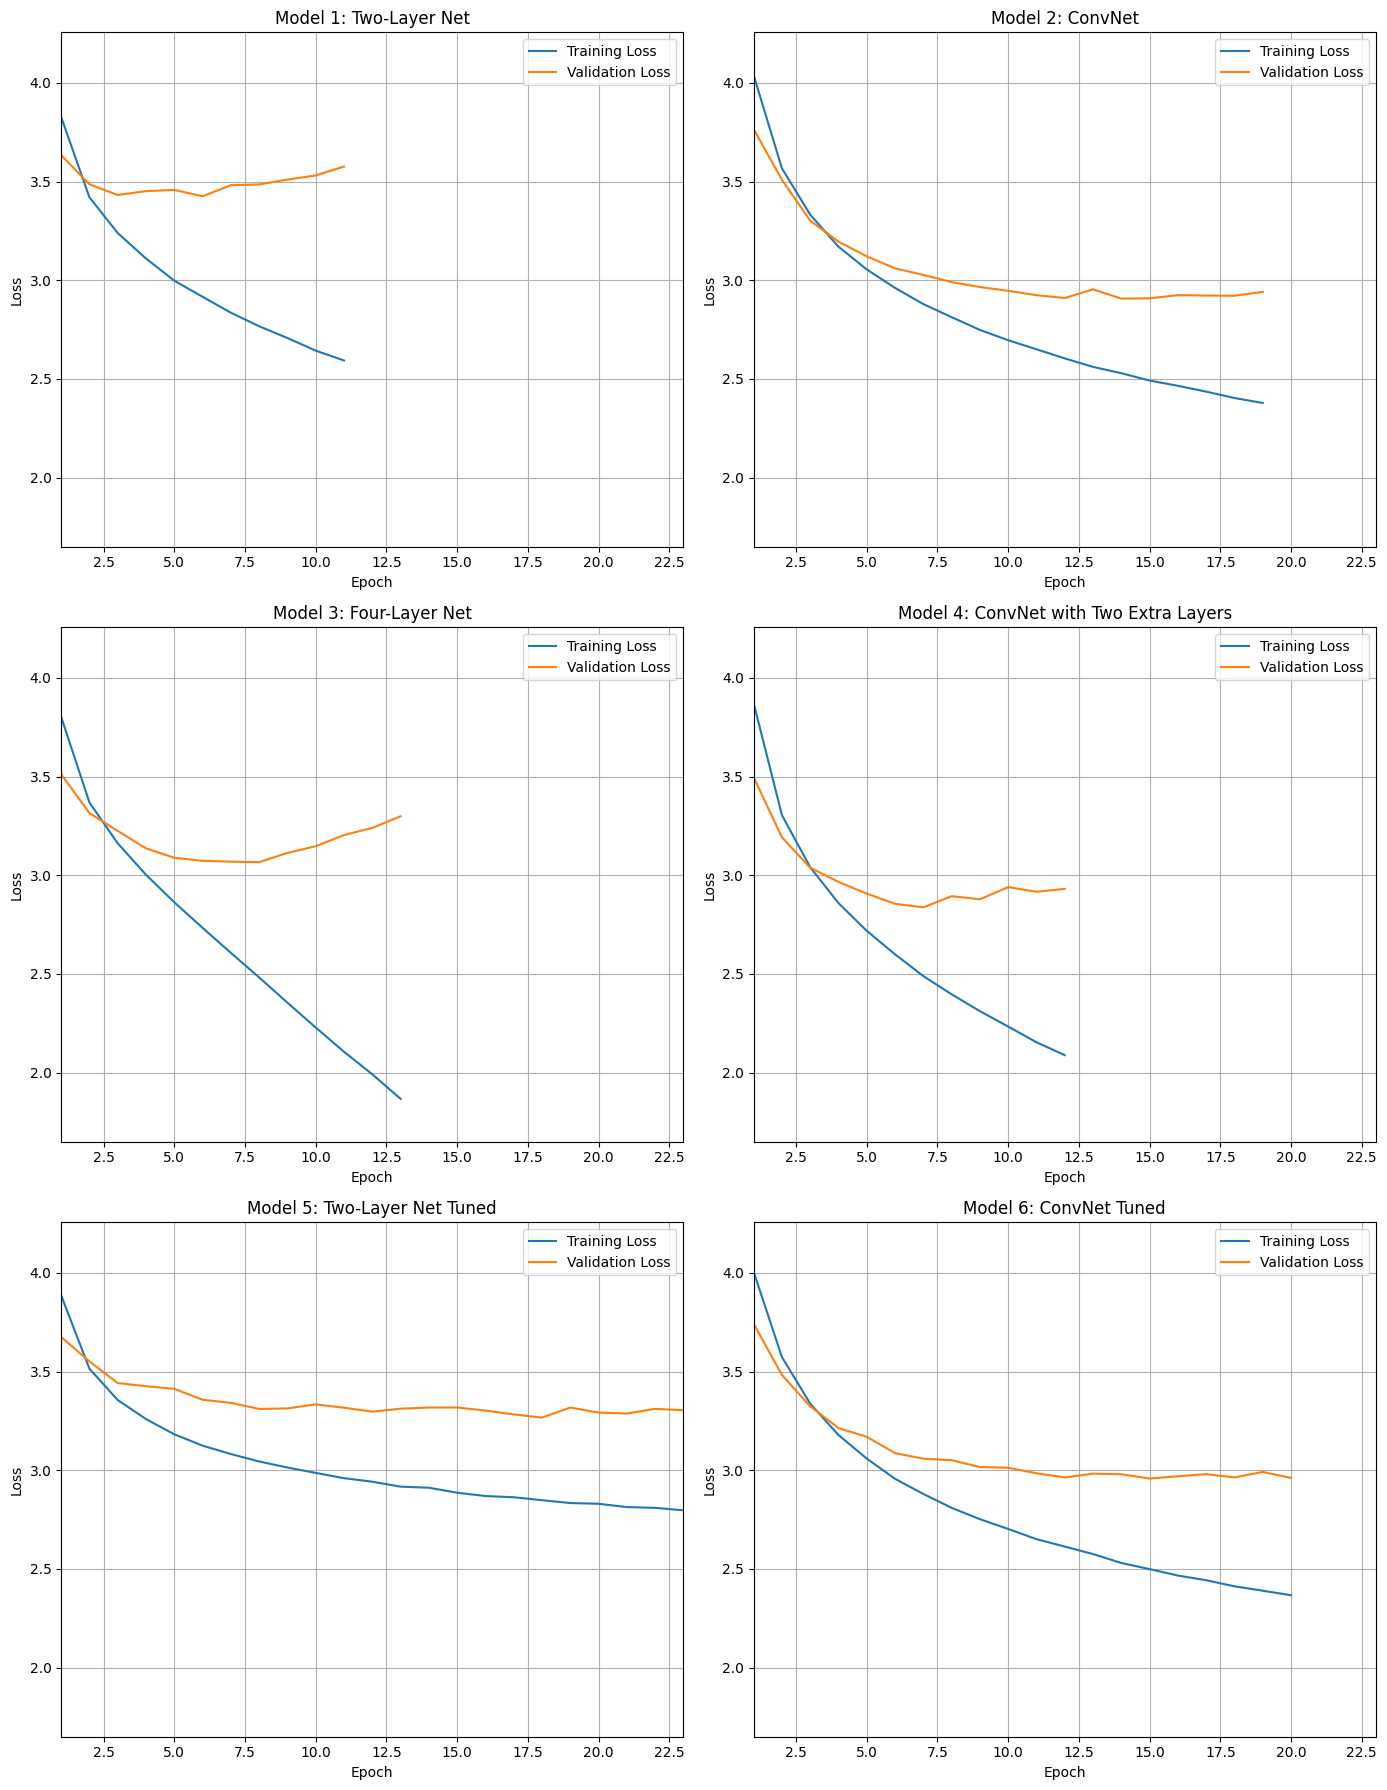

In [31]:
# Create a figure with 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(14, 18))

# Define epochs for x-axis
epochs1 = range(1, len(train_losses1) + 1)
epochs2 = range(1, len(train_losses2) + 1)
epochs3 = range(1, len(train_losses3) + 1)
epochs4 = range(1, len(train_losses4) + 1)
epochs5 = range(1, len(train_losses5) + 1)
epochs6 = range(1, len(train_losses6) + 1)

# Find maximum number of epochs across all models
max_epochs = max(
    len(epochs1),
    len(epochs2),
    len(epochs3),
    len(epochs4),
    len(epochs5),
    len(epochs6)
)

# Collect all losses to find global min and max
all_train_losses = (
    train_losses1 +
    train_losses2 +
    train_losses3 +
    train_losses4 +
    train_losses5 +
    train_losses6
)
all_val_losses = (
    val_losses1 +
    val_losses2 +
    val_losses3 +
    val_losses4 +
    val_losses5 +
    val_losses6
)
all_losses = all_train_losses + all_val_losses

# Compute global min and max loss values
global_min_loss = min(all_losses)
global_max_loss = max(all_losses)

# Set y-axis limits slightly beyond the global min and max
padding = 0.1 * (global_max_loss - global_min_loss)
y_min = global_min_loss - padding
y_max = global_max_loss + padding

# Plot for Model 1
axs[0, 0].plot(epochs1, train_losses1, label='Training Loss')
axs[0, 0].plot(epochs1, val_losses1, label='Validation Loss')
axs[0, 0].set_title('Model 1: Two-Layer Net')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()
axs[0, 0].grid(True)
axs[0, 0].set_xlim(1, max_epochs)
axs[0, 0].set_ylim(y_min, y_max)

# Plot for Model 2
axs[0, 1].plot(epochs2, train_losses2, label='Training Loss')
axs[0, 1].plot(epochs2, val_losses2, label='Validation Loss')
axs[0, 1].set_title('Model 2: ConvNet')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].legend()
axs[0, 1].grid(True)
axs[0, 1].set_xlim(1, max_epochs)
axs[0, 1].set_ylim(y_min, y_max)

# Plot for Model 3
axs[1, 0].plot(epochs3, train_losses3, label='Training Loss')
axs[1, 0].plot(epochs3, val_losses3, label='Validation Loss')
axs[1, 0].set_title('Model 3: Four-Layer Net')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()
axs[1, 0].grid(True)
axs[1, 0].set_xlim(1, max_epochs)
axs[1, 0].set_ylim(y_min, y_max)

# Plot for Model 4
axs[1, 1].plot(epochs4, train_losses4, label='Training Loss')
axs[1, 1].plot(epochs4, val_losses4, label='Validation Loss')
axs[1, 1].set_title('Model 4: ConvNet with Two Extra Layers')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].set_xlim(1, max_epochs)
axs[1, 1].set_ylim(y_min, y_max)

# Plot for Model 5
axs[2, 0].plot(epochs5, train_losses5, label='Training Loss')
axs[2, 0].plot(epochs5, val_losses5, label='Validation Loss')
axs[2, 0].set_title('Model 5: Two-Layer Net Tuned')
axs[2, 0].set_xlabel('Epoch')
axs[2, 0].set_ylabel('Loss')
axs[2, 0].legend()
axs[2, 0].grid(True)
axs[2, 0].set_xlim(1, max_epochs)
axs[2, 0].set_ylim(y_min, y_max)

# Plot for Model 6
axs[2, 1].plot(epochs6, train_losses6, label='Training Loss')
axs[2, 1].plot(epochs6, val_losses6, label='Validation Loss')
axs[2, 1].set_title('Model 6: ConvNet Tuned')
axs[2, 1].set_xlabel('Epoch')
axs[2, 1].set_ylabel('Loss')
axs[2, 1].legend()
axs[2, 1].grid(True)
axs[2, 1].set_xlim(1, max_epochs)
axs[2, 1].set_ylim(y_min, y_max)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('training_validation_curves.png', dpi=300)

# Show the plot
plt.show()


<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [32]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''
    # Initialize the STL10 dataset (we will use the test set to visualize random samples)
    transform = transforms.Compose([transforms.ToTensor()])
    dataset = torchvision.datasets.STL10(root='./data', split='test', download=True, transform=transform)
    
    # Prepare subplots for visualization
    num_classes = len(class_mapping)
    fig, axs = plt.subplots(num_classes, 5, figsize=(15, 10))
    
    # Initialize a dictionary to track the number of samples visualized per class
    class_images = {class_idx: 0 for class_idx in class_mapping.keys()}
    
    # Mapping from class labels to row indices
    label_to_row_idx = {label: idx for idx, label in enumerate(class_mapping.keys())}
    
    # Iterate through the dataset
    for img, label in dataset:
        if label in class_mapping and class_images[label] < 5:
            row_idx = label_to_row_idx[label]
            col_idx = class_images[label]
            class_images[label] += 1
            axs[row_idx, col_idx].imshow(img.permute(1, 2, 0))  # Permute to (H, W, C)
            axs[row_idx, col_idx].set_title(f'{class_mapping[label]}')
            axs[row_idx, col_idx].axis('off')
            if all(count == 5 for count in class_images.values()):
                break  # Stop if we've collected 5 images for each class
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()


Files already downloaded and verified


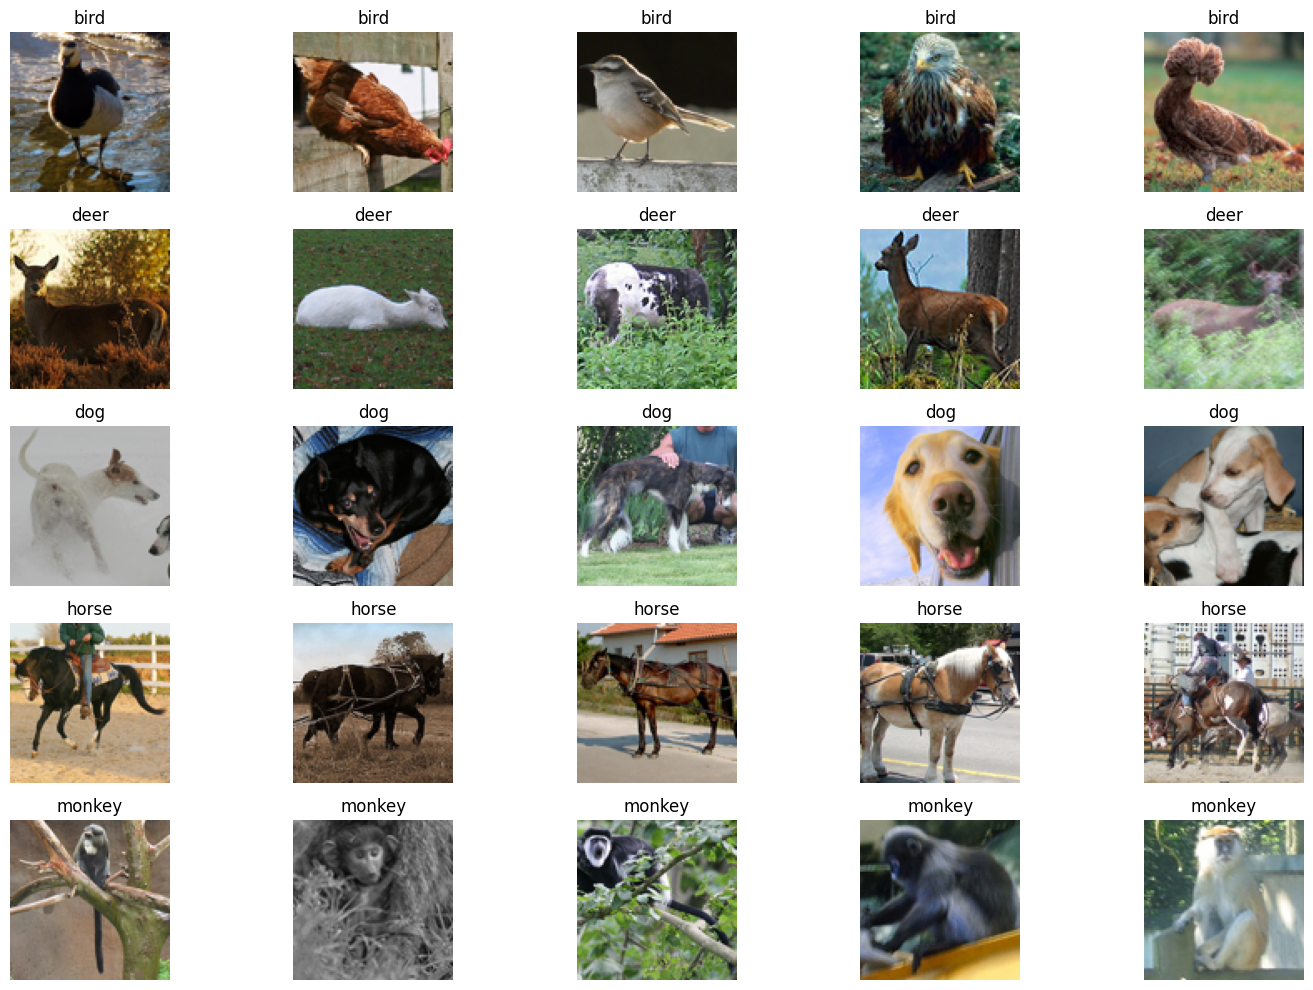

In [33]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [34]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''
        split = 'train' if train else 'test'
        self.stl10_data = STL10(root=root, split=split, download=True, transform=transform)
        self.transform = transform

    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''
        return len(self.stl10_data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''
        img, label = self.stl10_data[idx]
        if self.transform:
            img = self.transform(img)
        return img, label

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

## Further Edit STL-10

In [35]:
class STL10Subset(Dataset):
    def __init__(self, root, split='train', transform=None, target_classes=None):
        '''
        Initializes the STL10 dataset with specified target classes.

        Args:
            root (str): Root directory of the dataset.
            split (str): 'train' or 'test' split.
            transform (callable, optional): A function/transform to apply to the images.
            target_classes (list): List of target class indices to include.
        '''
        self.stl10_data = STL10(root=root, split=split, download=True)
        self.transform = transform
        self.target_classes = target_classes
        self.data = []
        self.labels = []
        class_to_idx = {cls: idx for idx, cls in enumerate(target_classes)}
        for img, label in zip(self.stl10_data.data, self.stl10_data.labels):
            if label in target_classes:
                self.data.append(Image.fromarray(np.transpose(img, (1, 2, 0))))
                self.labels.append(class_to_idx[label])

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img = self.data[idx]
        label = self.labels[idx]
        if self.transform:
            img = self.transform(img)
        return img, label


In [36]:
# Define target classes and their mapping
original_classes = {1: 'airplane', 2: 'bird', 3: 'car', 4: 'cat', 5: 'deer', 
                    6: 'dog', 7: 'horse', 8: 'monkey', 9: 'ship', 10: 'truck'}

# Target classes: bird (2), deer (5), dog (6), horse (7), monkey (8)
target_classes = [2, 5, 6, 7, 8]
class_names = ['bird', 'deer', 'dog', 'horse', 'monkey']

# Data transformations (Resize images to 32x32 to match CIFAR-100 input size)
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4467, 0.4398, 0.4066],
                         std=[0.2247, 0.2218, 0.2238]),
])


In [37]:
def create_transforms_stl():
    '''
    Creates the data transformations for the STL-10 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''
    transform = transforms.Compose([
        transforms.Resize(32),
        transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.4467, 0.4398, 0.4066],
                             std=[0.2247, 0.2218, 0.2238]),
    ])
    return transform


In [38]:
# Create the data transformations
transform_custom = create_transforms_stl()

# Initialise the training set and test set
train_set_custom = STL10Subset(root='./data/', split='train', transform=transform_custom, target_classes=target_classes)
test_set_custom = STL10Subset(root='./data/', split='test', transform=transform_custom, target_classes=target_classes)


# Define the length of the validation set (e.g., 20% validation)
val_size = int(0.2 * len(train_set_custom))  # 20% for validation
train_size = len(train_set_custom) - val_size

# Split the dataset into training and validation sets
train_subset_custom, val_subset_custom = random_split(train_set_custom, [train_size, val_size])

# Create data loaders for training, validation, and test sets
train_stl_loader = DataLoader(dataset=train_subset_custom, batch_size=64, shuffle=True)
val_stl_loader = DataLoader(dataset=val_subset_custom, batch_size=64, shuffle=False)
test_stl_loader = DataLoader(dataset=test_set_custom, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


## Edit the Best Model and Pre-train it

In [39]:
class ModConvNet_2(nn.Module):

    def __init__(self, num_classes=100, use_batch_norm=False):
        '''
        Initializes the convolutional neural network model.

        Args:
            num_classes (int): Number of output classes.
            use_batch_norm (bool): Whether to use batch normalization.
        '''

        super(ModConvNet_2, self).__init__()

        self.use_batch_norm = use_batch_norm  # Store batch normalization flag

        # First convolutional layer
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        if self.use_batch_norm:
            self.bn1 = nn.BatchNorm2d(32)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        if self.use_batch_norm:
            self.bn2 = nn.BatchNorm2d(64)

        # Third convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        if self.use_batch_norm:
            self.bn3 = nn.BatchNorm2d(128)

        # Fourth convolutional layer (new layer)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        if self.use_batch_norm:
            self.bn4 = nn.BatchNorm2d(256)

        # Fifth convolutional layer (new layer)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
        if self.use_batch_norm:
            self.bn5 = nn.BatchNorm2d(512)

        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 1 * 1, 512)
        if self.use_batch_norm:
            self.bn_fc1 = nn.BatchNorm1d(512)

        self.fc2 = nn.Linear(512, 256)
        if self.use_batch_norm:
            self.bn_fc2 = nn.BatchNorm1d(256)

        self.fc3 = nn.Linear(256, num_classes)

        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        # First convolutional block
        x = self.conv1(x)
        if self.use_batch_norm:
            x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)

        # Second convolutional block
        x = self.conv2(x)
        if self.use_batch_norm:
            x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        # Third convolutional block
        x = self.conv3(x)
        if self.use_batch_norm:
            x = self.bn3(x)
        x = F.relu(x)
        x = self.pool(x)

        # Fourth convolutional block (new layer)
        x = self.conv4(x)
        if self.use_batch_norm:
            x = self.bn4(x)
        x = F.relu(x)
        x = self.pool(x)

        # Fifth convolutional block (new layer)
        x = self.conv5(x)
        if self.use_batch_norm:
            x = self.bn5(x)
        x = F.relu(x)
        x = self.pool(x)

        # Flatten the tensor
        x = x.view(x.size(0), -1)

        # First fully connected layer
        x = self.fc1(x)
        if self.use_batch_norm:
            x = self.bn_fc1(x)
        x = F.relu(x)
        x = self.dropout(x)

        # Second fully connected layer (new layer)
        x = self.fc2(x)
        if self.use_batch_norm:
            x = self.bn_fc2(x)
        x = F.relu(x)
        x = self.dropout(x)

        # Output layer
        x = self.fc3(x)

        return x


In [40]:
# Initialize the ModConvNet_2 model
model_ModConvNet_2 = ModConvNet_2(num_classes=100, use_batch_norm=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ModConvNet_2.to(device)

print(f"Using CUDA: {torch.cuda.is_available()}")

# Define Loss function
criterion = nn.CrossEntropyLoss()

# Create Optimizer
optimizer_ModConvNet_2 = create_optimizer(model_ModConvNet_2)

# Train the model
print('Training the Model: ModConvNet_2')
train_losses7, val_losses7, train_accuracies7, val_accuracies7 = train(
    net=model_ModConvNet_2,
    train_loader=train_loader_2,
    validation_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer_ModConvNet_2,
    epochs=100,
    scheduler=create_scheduler(optimizer_ModConvNet_2),
    patience=5  # Early stopping patience
)

# Save the trained model
torch.save(model_ModConvNet_2.state_dict(), 'best_model_modconvnet2.pth')

# Validate the model
print('Validating the Model: ModConvNet_2')
validate(model_ModConvNet_2, test_loader)


Using CUDA: True
Training the Model: ModConvNet_2


Epoch [1/100], Train Loss: 3.8273, Train Acc: 10.41%, Val Loss: 4.6902, Val Acc: 9.04%
Epoch [2/100], Train Loss: 3.1816, Train Acc: 19.95%, Val Loss: 3.3939, Val Acc: 19.19%
Epoch [3/100], Train Loss: 2.8404, Train Acc: 26.57%, Val Loss: 3.0542, Val Acc: 24.53%
Epoch [4/100], Train Loss: 2.5991, Train Acc: 31.25%, Val Loss: 2.6616, Val Acc: 30.99%
Epoch [5/100], Train Loss: 2.4096, Train Acc: 35.16%, Val Loss: 2.7008, Val Acc: 31.31%
Epoch [6/100], Train Loss: 2.2315, Train Acc: 38.89%, Val Loss: 2.4453, Val Acc: 36.58%
Epoch [7/100], Train Loss: 2.0816, Train Acc: 41.95%, Val Loss: 2.4348, Val Acc: 37.35%
Epoch [8/100], Train Loss: 1.9181, Train Acc: 45.70%, Val Loss: 2.4358, Val Acc: 36.55%
Epoch [9/100], Train Loss: 1.7712, Train Acc: 49.26%, Val Loss: 2.1675, Val Acc: 42.65%
Epoch [10/100], Train Loss: 1.6333, Train Acc: 52.38%, Val Loss: 2.1293, Val Acc: 44.51%
Epoch [11/100], Train Loss: 1.5087, Train Acc: 55.17%, Val Loss: 2.6620, Val Acc: 37.97%
Epoch [12/100], Train Loss: 1.3

32.12

## Fine Tune the Best Model

In [41]:
def train(net, train_loader, validation_loader, criterion, optimizer, epochs=50, scheduler=None, patience=3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net.to(device)

    best_val_loss = float('inf')
    patience_counter = 0

    # Lists to store metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training phase
        net.train()
        training_loss = 0.0
        train_total = 0
        train_correct = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            training_loss += loss.item() * inputs.size(0)

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        if scheduler:
            scheduler.step()

        # Validation phase
        net.eval()
        validation_loss = 0.0
        val_total = 0
        val_correct = 0

        with torch.no_grad():
            for inputs, labels in validation_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)
                loss = criterion(outputs, labels)

                validation_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        # Compute average losses and accuracies
        avg_train_loss = training_loss / len(train_loader.dataset)
        avg_val_loss = validation_loss / len(validation_loader.dataset)
        train_accuracy = 100 * train_correct / train_total
        val_accuracy = 100 * val_correct / val_total

        # Append metrics to lists
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
              f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_accuracy:.2f}%")

        # Early stopping logic
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0
            # Optionally save the best model
            torch.save(net.state_dict(), 'best_model.pth')
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break

    print("Training Completed")
    return train_losses, val_losses, train_accuracies, val_accuracies


In [42]:
# Instantiate the model with 100 classes and load pre-trained weights
model_finetune = ModConvNet_2(num_classes=100, use_batch_norm=True)
model_finetune.load_state_dict(torch.load('best_model_modconvnet2.pth'))

# Modify the output layer to have 5 classes
# In ModConvNet_2, the last fully connected layer is fc3
model_finetune.fc3 = nn.Linear(256, 5)

# Re-initialize the weights of the new output layer
nn.init.xavier_uniform_(model_finetune.fc3.weight)
nn.init.zeros_(model_finetune.fc3.bias)

# Move the model to device
model_finetune.to(device)

# Define Loss function
criterion = nn.CrossEntropyLoss()

# Create Optimizer with a lower learning rate for fine-tuning
optimizer_finetune = create_optimizer(model_finetune, learning_rate=1e-4)

# Prepare STL-10 data loaders (assuming you have the STL-10 data loaders ready)
# For example:
# stl10_train_loader, stl10_val_loader, stl10_test_loader

# Fine-tune the model
print('Fine-tuning the Model: ModConvNet_2 on STL-10')
train_losses8, val_losses8, train_accuracies8, val_accuracies8 = train(
    net=model_finetune,
    train_loader=train_stl_loader,
    validation_loader=val_stl_loader,
    criterion=criterion,
    optimizer=optimizer_finetune,
    epochs=50,
    scheduler=create_scheduler(optimizer_finetune),
    patience=5  # Early stopping patience
)

# Validate the fine-tuned model on the STL-10 test set
print('Validating the Fine-tuned Model: ModConvNet_2 on STL-10')
validate(model_finetune, test_stl_loader)


Fine-tuning the Model: ModConvNet_2 on STL-10
Epoch [1/50], Train Loss: 2.1815, Train Acc: 23.95%, Val Loss: 1.5733, Val Acc: 31.60%
Epoch [2/50], Train Loss: 1.8737, Train Acc: 32.55%, Val Loss: 1.2844, Val Acc: 48.00%
Epoch [3/50], Train Loss: 1.6110, Train Acc: 38.75%, Val Loss: 1.1679, Val Acc: 53.00%
Epoch [4/50], Train Loss: 1.5086, Train Acc: 43.35%, Val Loss: 1.0429, Val Acc: 56.20%
Epoch [5/50], Train Loss: 1.3440, Train Acc: 48.70%, Val Loss: 0.9757, Val Acc: 60.00%
Epoch [6/50], Train Loss: 1.2460, Train Acc: 52.10%, Val Loss: 0.9348, Val Acc: 61.20%
Epoch [7/50], Train Loss: 1.1908, Train Acc: 53.75%, Val Loss: 0.8853, Val Acc: 61.80%
Epoch [8/50], Train Loss: 1.1258, Train Acc: 55.65%, Val Loss: 0.8646, Val Acc: 63.20%
Epoch [9/50], Train Loss: 1.0922, Train Acc: 56.75%, Val Loss: 0.8595, Val Acc: 64.00%
Epoch [10/50], Train Loss: 1.0628, Train Acc: 57.85%, Val Loss: 0.7902, Val Acc: 64.80%
Epoch [11/50], Train Loss: 1.0053, Train Acc: 60.35%, Val Loss: 0.8006, Val Acc: 64

74.175

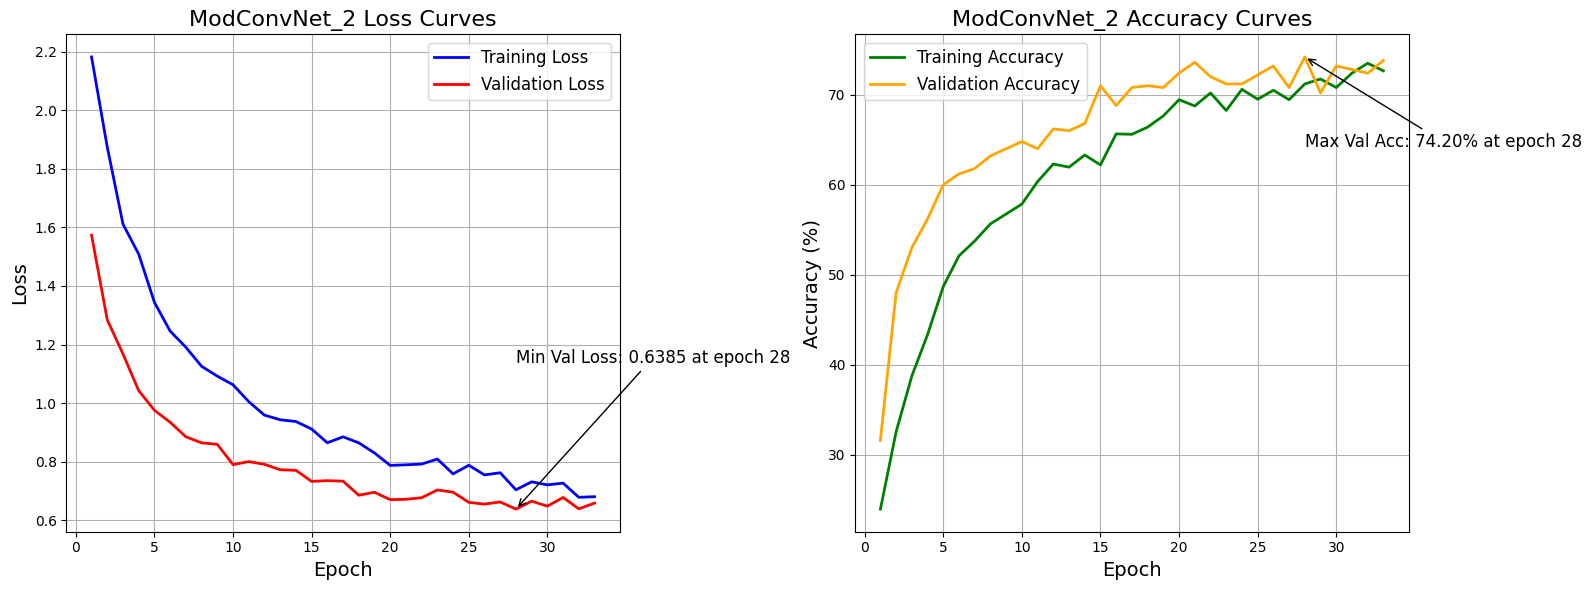

In [43]:
# Define epochs for x-axis
epochs = range(1, len(train_losses8) + 1)

# Create a figure with two subplots: one for loss, one for accuracy
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot Losses
axs[0].plot(epochs, train_losses8, label='Training Loss', color='blue', linewidth=2)
axs[0].plot(epochs, val_losses8, label='Validation Loss', color='red', linewidth=2)
axs[0].set_title('ModConvNet_2 Loss Curves', fontsize=16)
axs[0].set_xlabel('Epoch', fontsize=14)
axs[0].set_ylabel('Loss', fontsize=14)
axs[0].legend(fontsize=12)
axs[0].grid(True)

# Annotate the minimum validation loss
min_val_loss = min(val_losses8)
min_epoch = val_losses8.index(min_val_loss) + 1
axs[0].annotate(f'Min Val Loss: {min_val_loss:.4f} at epoch {min_epoch}',
                xy=(min_epoch, min_val_loss),
                xytext=(min_epoch, min_val_loss + 0.5),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                fontsize=12)

# Plot Accuracies
axs[1].plot(epochs, train_accuracies8, label='Training Accuracy', color='green', linewidth=2)
axs[1].plot(epochs, val_accuracies8, label='Validation Accuracy', color='orange', linewidth=2)
axs[1].set_title('ModConvNet_2 Accuracy Curves', fontsize=16)
axs[1].set_xlabel('Epoch', fontsize=14)
axs[1].set_ylabel('Accuracy (%)', fontsize=14)
axs[1].legend(fontsize=12)
axs[1].grid(True)

# Annotate the maximum validation accuracy
max_val_acc = max(val_accuracies8)
max_epoch_acc = val_accuracies8.index(max_val_acc) + 1
axs[1].annotate(f'Max Val Acc: {max_val_acc:.2f}% at epoch {max_epoch_acc}',
                xy=(max_epoch_acc, max_val_acc),
                xytext=(max_epoch_acc, max_val_acc - 10),
                arrowprops=dict(facecolor='black', arrowstyle='->'),
                fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('best_model_pretrain_training_curves.png', dpi=300)

# Show the plot
plt.show()


## Plot the Basic Results

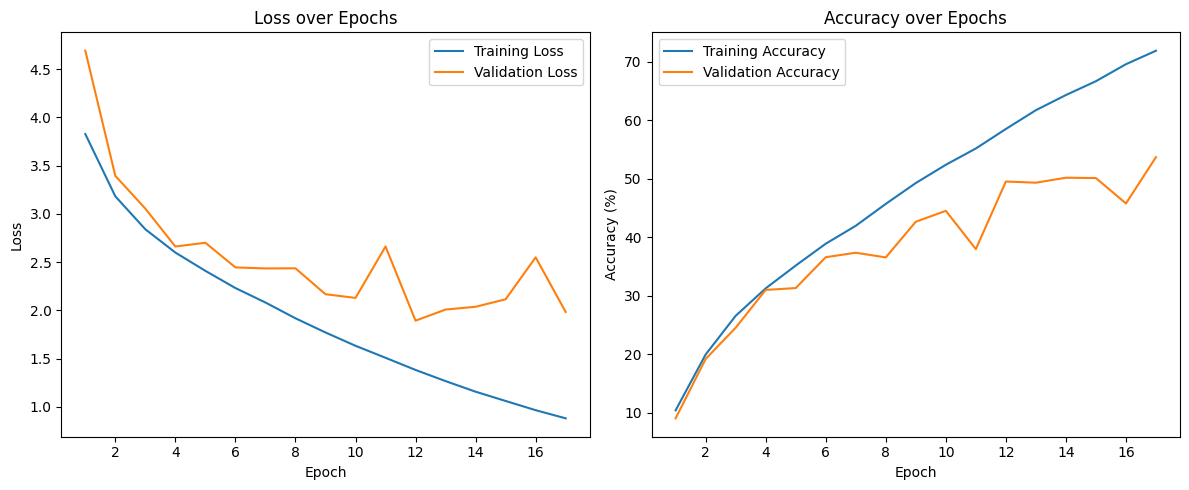

In [44]:
epochs = range(1, len(train_losses7) + 1)
plt.figure(figsize=(12,5))

# Plot Loss
plt.subplot(1,2,1)
plt.plot(epochs, train_losses7, label='Training Loss')
plt.plot(epochs, val_losses7, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1,2,2)
plt.plot(epochs, train_accuracies7, label='Training Accuracy')
plt.plot(epochs, val_accuracies7, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


## Perform TSNE and Plot the Features

c:\Users\Admin\anaconda3\envs\cv1_group_4_dependencies_1\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


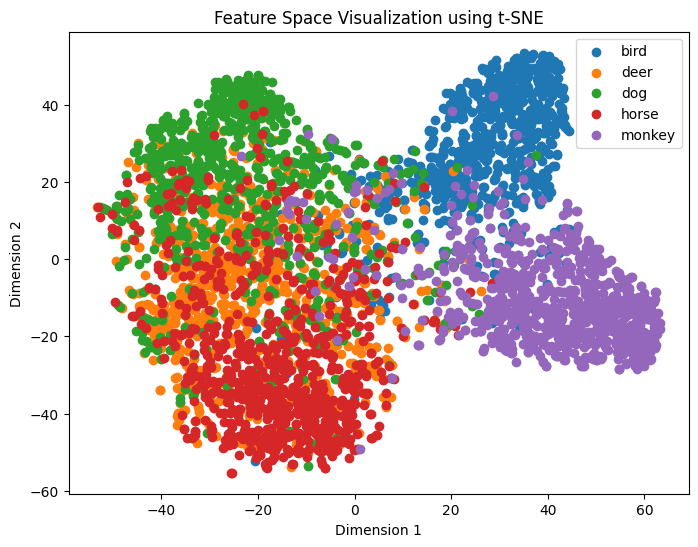

In [45]:
# Collect features and labels from the test set
model_finetune.eval()
features = []
labels_list = []

with torch.no_grad():
    for inputs, labels in test_stl_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_finetune(inputs)
        
        # Extract features from the last hidden layer before the output
        # Modify according to your model architecture
        x = inputs
        x = model_finetune.conv1(x)
        if model_finetune.use_batch_norm:
            x = model_finetune.bn1(x)
        x = F.relu(x)
        x = model_finetune.pool(x)

        x = model_finetune.conv2(x)
        if model_finetune.use_batch_norm:
            x = model_finetune.bn2(x)
        x = F.relu(x)
        x = model_finetune.pool(x)

        x = model_finetune.conv3(x)
        if model_finetune.use_batch_norm:
            x = model_finetune.bn3(x)
        x = F.relu(x)
        x = model_finetune.pool(x)

        x = model_finetune.conv4(x)
        if model_finetune.use_batch_norm:
            x = model_finetune.bn4(x)
        x = F.relu(x)
        x = model_finetune.pool(x)

        x = model_finetune.conv5(x)
        if model_finetune.use_batch_norm:
            x = model_finetune.bn5(x)
        x = F.relu(x)
        x = model_finetune.pool(x)

        x = x.view(x.size(0), -1)
        x = model_finetune.fc1(x)
        if model_finetune.use_batch_norm:
            x = model_finetune.bn_fc1(x)
        x = F.relu(x)
        x = model_finetune.dropout(x)

        x = model_finetune.fc2(x)
        if model_finetune.use_batch_norm:
            x = model_finetune.bn_fc2(x)
        x = F.relu(x)
        x = model_finetune.dropout(x)

        # x is now the features before the final output layer
        features.append(x.cpu().numpy())
        labels_list.append(labels.cpu().numpy())

features = np.concatenate(features, axis=0)
labels_list = np.concatenate(labels_list, axis=0)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
features_2d = tsne.fit_transform(features)

# Plot the features
plt.figure(figsize=(8,6))
for idx, class_name in enumerate(class_names):
    idxs = labels_list == idx
    plt.scatter(features_2d[idxs, 0], features_2d[idxs, 1], label=class_name)
plt.legend()
plt.title('Feature Space Visualization using t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()


<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [46]:
# This has been implemented in the previous section, we didn't do anything extra. The best accuracy we got is 

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
| Emma | 33 % | 33 % | 34 % |
| Jasper | 33 % | 34 % | 33 % |
| Platon | 34 % | 33 % | 33 % |

### - End of Notebook -